<img src="LogoUR.png" alt="LogoUR">  

# Estadística aplicada al Procesamiento del Lenguaje Natural

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

### Funciones importantes a usar durante el proceso

In [1]:
#Estas funciones se explican posteriormente

def group_by_sturges(df, column):
    num_bins = int(np.ceil(np.log2(len(df[column])) + 1))
    bin_width = (df[column].max() - df[column].min()) / num_bins    
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)
    
    # Generar etiquetas para los intervalos basados en los límites de los intervalos
    labels = [f"[{round(bin_edges[i],2)}-{round(bin_edges[i+1],2)})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def marca_de_clase(intervalo):
    limite_inferior, limite_superior = map(float, intervalo.strip("[]()").split('-'))
    return (limite_inferior + limite_superior) / 2

In [194]:
df = pd.read_csv('Reviews.csv')
# df.head()
df2=df.loc[:6,['Id','Score', 'Summary', 'Text']]
df2.head()


,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...


In [195]:
# Contar la longitud de las palabras en la columna 'texto'
df['Longitud_Texto'] = df['Text'].apply(lambda x: len(x.split()))

df2=df.loc[:6,['Id','Score', 'Summary', 'Text','Longitud_Texto']]
df2.head()

,Id,Score,Summary,Text,Longitud_Texto
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,48
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,94
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,41
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,27


## TABLA DE FRECUENCIAS

In [196]:
#Creamos la tabla de frecuencias de la variable "longitud de palabras":

frecuencias_long = df['Longitud_Texto'].value_counts()
frecuencias_long = frecuencias_long.sort_index()
frecuencias_long

Longitud_Texto
3        2
4        1
5        1
6        8
7       51
        ..
2066     1
2092     1
2149     1
2520     1
3432     3
Name: count, Length: 998, dtype: int64

In [197]:
# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_long / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_long.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_long.index,
    'n_i': frecuencias_long.values,
    'f_i': frecuencias_relativas.values,
    'N_i':frecuencias_acumuladas.values,
    'F_i':frecuencias_relativas_acum.values
})


print("Tabla de frecuencias de la columna\n'Longitud del texto':\n")
print(tabla_frecuencias.head(10))
print(".\n.\n.")
print(tabla_frecuencias.tail(10))

Tabla de frecuencias de la columna
'Longitud del texto':

   x_i  n_i       f_i  N_i       F_i
0    3    2  0.000004    2  0.000004
1    4    1  0.000002    3  0.000005
2    5    1  0.000002    4  0.000007
3    6    8  0.000014   12  0.000021
4    7   51  0.000090   63  0.000111
5    8   10  0.000018   73  0.000128
6    9   26  0.000046   99  0.000174
7   10   50  0.000088  149  0.000262
8   11  106  0.000186  255  0.000449
9   12  149  0.000262  404  0.000711
.
.
.
      x_i  n_i       f_i     N_i       F_i
988  1791    1  0.000002  568442  0.999979
989  1818    1  0.000002  568443  0.999981
990  1853    2  0.000004  568445  0.999984
991  1901    1  0.000002  568446  0.999986
992  2061    1  0.000002  568447  0.999988
993  2066    1  0.000002  568448  0.999989
994  2092    1  0.000002  568449  0.999991
995  2149    1  0.000002  568450  0.999993
996  2520    1  0.000002  568451  0.999995
997  3432    3  0.000005  568454  1.000000


### TABLA DE FRECUECIAS POR INTERVALOS

In [198]:
#########################################
#########################################
#frecuencias por intervalos:
#########################################
#########################################

df['Long_text_agrupado'] = pd.cut(df['Longitud_Texto'], bins=[1,100,200,300,400,500,600,700,800,900,1000,3500], labels=['1-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000','>1000'], right=False)

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['Long_text_agrupado'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
print(frecuencias_grupo)


Long_text_agrupado
1-100       430223
100-200     102820
200-300      23215
300-400       6954
400-500       2603
500-600       1289
600-700        476
700-800        250
800-900        369
900-1000        70
>1000          185
Name: count, dtype: int64


In [199]:
#########################################
#########################################
#frecuencias por intervalos regla k de sturges
#########################################
#########################################

min_value = df['Longitud_Texto'].min()
max_value = df['Longitud_Texto'].max()

R=max_value-min_value
#número de intervalos:
k= int(1+3.322*math.log10(df.shape[0]))
print(f"{k} grupos")
#amplitud del intervalo
A=R/k
bins = [min_value + i * A for i in range(k)]
bins.append(max_value)  # Añadir el límite superior del último intervalo

# Asignar cada valor al intervalo correspondiente
df['Long_text_agrupado'] = pd.cut(df['Longitud_Texto'], bins=bins, include_lowest=True)


# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['Long_text_agrupado'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
frecuencias_grupo


20 grupos


Long_text_agrupado
(2.999, 174.45]      520456
(174.45, 345.9]       39895
(345.9, 517.35]        5903
(517.35, 688.8]        1287
(688.8, 860.25]         404
(860.25, 1031.7]        339
(1031.7, 1203.15]        68
(1203.15, 1374.6]        48
(1374.6, 1546.05]        28
(1546.05, 1717.5]         9
(1717.5, 1888.95]         8
(1888.95, 2060.4]         1
(2060.4, 2231.85]         4
(2231.85, 2403.3]         0
(2403.3, 2574.75]         1
(2574.75, 2746.2]         0
(2746.2, 2917.65]         0
(2917.65, 3089.1]         0
(3089.1, 3260.55]         0
(3260.55, 3432.0]         3
Name: count, dtype: int64

In [206]:
# Calcular los grupos usando la función creada group_by_sturges
df['group_sturges'] = group_by_sturges(df, 'Longitud_Texto')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
print("\nFrecuencias usando el método de sturges\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase = list(map(marca_de_clase, list(frecuencias_grupo.index)))

print(frecuencias_grupo)
print(frecuencias_grupo.index)
print(MarcaDeClase)


Frecuencias usando el método de sturges

group_sturges
[3.0-166.29)         515441
[166.29-329.57)       43696
[329.57-492.86)        6595
[492.86-656.14)        1685
[656.14-819.43)         453
[819.43-982.71)         381
[982.71-1146.0)          80
[1146.0-1309.29)         57
[1309.29-1472.57)        33
[1472.57-1635.86)        16
[1635.86-1799.14)         5
[1799.14-1962.43)         4
[1962.43-2125.71)         3
[2125.71-2289.0)          1
[2289.0-2452.29)          0
[2452.29-2615.57)         1
[2615.57-2778.86)         0
[2778.86-2942.14)         0
[2942.14-3105.43)         0
[3105.43-3268.71)         0
[3268.71-3435.43)         3
Name: count, dtype: int64
CategoricalIndex(['[3.0-166.29)', '[166.29-329.57)', '[329.57-492.86)',
                  '[492.86-656.14)', '[656.14-819.43)', '[819.43-982.71)',
                  '[982.71-1146.0)', '[1146.0-1309.29)', '[1309.29-1472.57)',
                  '[1472.57-1635.86)', '[1635.86-1799.14)',
                  '[1799.14-1962.43)', '[1962

In [208]:
# #media aritmética para estos datos agrupaados:
# marcas_de_clase =  MarcaDeClase
# frecuencias     =  frecuencias_grupo.values
# # Calculando la suma de los productos de las marcas de clase y las frecuencias
# suma_productos = sum(marcas_de_clase[i] * frecuencias[i] for i in range(len(marcas_de_clase)))

# # # Calculando el total de observaciones
# total_observaciones = sum(frecuencias)

# # # Calculando la media aritmética
# media_aritmetica = suma_productos / total_observaciones

# print("La media aritmética es:", round(media_aritmetica,2))

In [209]:
# agrupar los últimos grupos en uno solo:

lista=['[1472.57-1635.86)', '[1635.86-1799.14)',
'[1799.14-1962.43)', '[1962.43-2125.71)', '[2125.71-2289.0)',
'[2289.0-2452.29)', '[2452.29-2615.57)', '[2615.57-2778.86)',
'[2778.86-2942.14)', '[2942.14-3105.43)',
'[3105.43-3268.71)', '[3268.71-3435.43)']

# Reemplazar los valores en la columna 'columna_original' con ">1472.571" si coinciden con los valores de la lista
df['group_sturges'] = df['group_sturges'].replace(lista, '[1472.571-3435.43]')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
print("\nFrecuencias usando el método de sturges\n")
print(frecuencias_grupo)



Frecuencias usando el método de sturges

group_sturges
[3.0-166.29)          515441
[166.29-329.57)        43696
[329.57-492.86)         6595
[492.86-656.14)         1685
[656.14-819.43)          453
[819.43-982.71)          381
[982.71-1146.0)           80
[1146.0-1309.29)          57
[1309.29-1472.57)         33
[1472.571-3435.43]        33
Name: count, dtype: int64


In [210]:
# Calcular la frecuencia relativa
frecuencias_relativas_gr = frecuencias_grupo / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr = frecuencias_grupo.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr = frecuencias_acumuladas_gr / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_gr = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'f_i': frecuencias_relativas_gr.values,
    'N_i':frecuencias_acumuladas_gr.values,
    'F_i':frecuencias_relativas_acum_gr.values
})


print("Tabla de frecuencias agrupadas poro intervalo de la columna\n'Longitud del texto':\n")
print(tabla_frecuencias_gr)

Tabla de frecuencias agrupadas poro intervalo de la columna
'Longitud del texto':

                  x_i     n_i       f_i     N_i       F_i
0        [3.0-166.29)  515441  0.906742  515441  0.906742
1     [166.29-329.57)   43696  0.076868  559137  0.983610
2     [329.57-492.86)    6595  0.011602  565732  0.995212
3     [492.86-656.14)    1685  0.002964  567417  0.998176
4     [656.14-819.43)     453  0.000797  567870  0.998973
5     [819.43-982.71)     381  0.000670  568251  0.999643
6     [982.71-1146.0)      80  0.000141  568331  0.999784
7    [1146.0-1309.29)      57  0.000100  568388  0.999884
8   [1309.29-1472.57)      33  0.000058  568421  0.999942
9  [1472.571-3435.43]      33  0.000058  568454  1.000000


Tabla de frecuencias del jercicio 1 (score) para contestar las preguntas

In [211]:

#########################################
#########################################
####tabla de frecuencias del Score
#########################################
#########################################


# Calcular la tabla de frecuencias de la columna 'Score'
frecuencias_score = df['Score'].value_counts()
frecuencias_score = frecuencias_score.sort_index()


# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_score / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_score.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)


# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_score.index,
    'n_i': frecuencias_score.values,
    'f_i': frecuencias_relativas.values,
    "N_i":frecuencias_acumuladas.values,
    "F_i":frecuencias_relativas_acum.values
})
tabla_frecuencias

,x_i,n_i,f_i,N_i,F_i
0,1,52268,0.091948,52268,0.091948
1,2,29769,0.052368,82037,0.144316
2,3,42640,0.075010,124677,0.219326
3,4,80655,0.141885,205332,0.361211
4,5,363122,0.638789,568454,1.000000


## GRÁFICOS UNIDIMENSIONALES

### Gráfico de sectores:

Text(0.5, 1.0, 'Gráfico de frecuencia del Score')

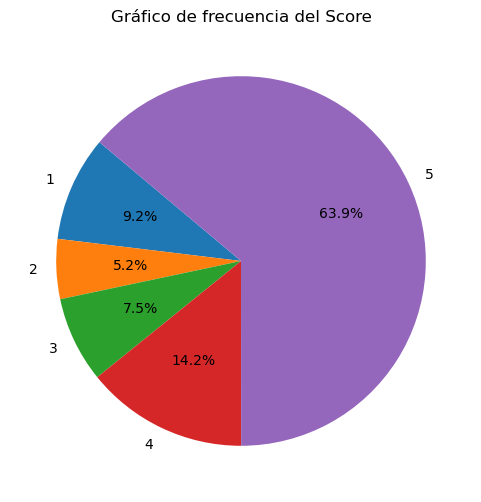

In [212]:
sizes = tabla_frecuencias.n_i
labels = tabla_frecuencias.x_i

plt.figure(figsize=(6, 6))  # Tamaño del gráfico (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Agregar un título
plt.title('Gráfico de frecuencia del Score')

### Gráfico de barras de valores:

sentiment
Malo (1-3)     124677
Bueno (4-5)    443777
Name: count, dtype: int64


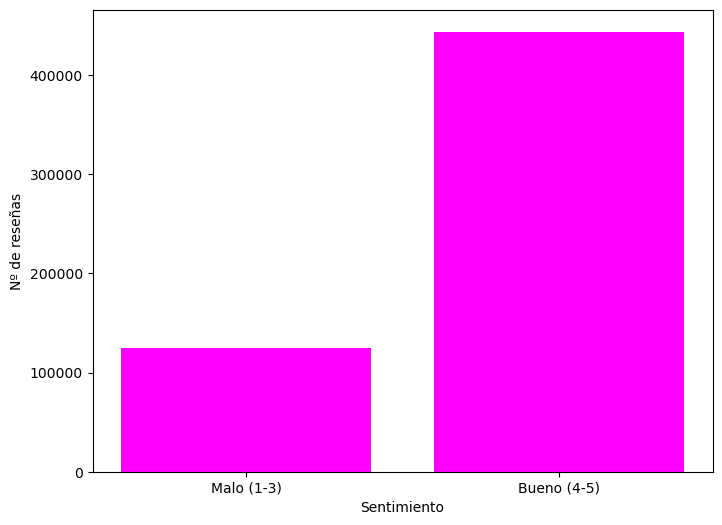

In [213]:
#Primero clasificaremos las reseñas en doos grupos (buenas o malas)
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
df['sentiment'] = pd.cut(df['Score'], bins=[1,4,6], labels=['Malo (1-3)', 'Bueno (4-5)'], right=False)

frecuencias_sentiment = df['sentiment'].value_counts()
frecuencias_sentiment = frecuencias_sentiment.sort_index()

print(frecuencias_sentiment)

# Datos de ejemplo
labels = frecuencias_sentiment.index
sizes = frecuencias_sentiment.values

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
plt.bar(labels, sizes, color='magenta')

# Agregar etiquetas y título
plt.ylabel('Nº de reseñas')
plt.xlabel('Sentimiento')
# plt.title('Gráfico de sentimeinto')

# Mostrar el gráfico
plt.show()

### Histograma:

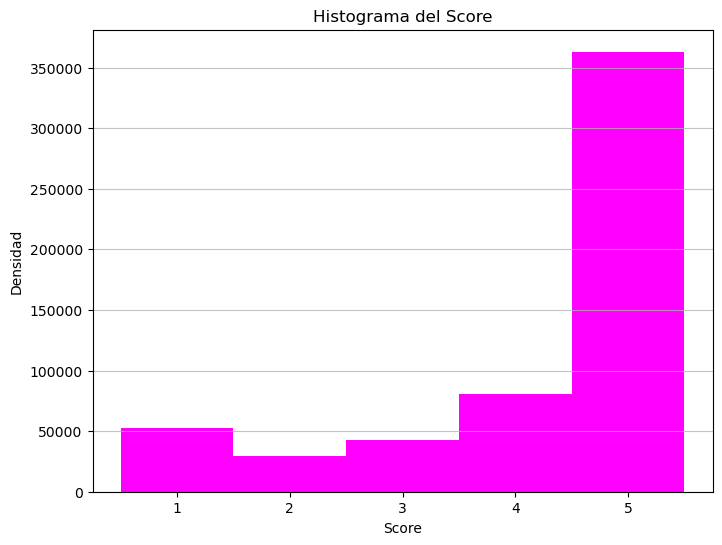

Frecuencia del bin 1.0 - 2.0: 52268.0
Frecuencia del bin 2.0 - 3.0: 29769.0
Frecuencia del bin 3.0 - 4.0: 42640.0
Frecuencia del bin 4.0 - 5.0: 80655.0
Frecuencia del bin 5.0 - 6.0: 363122.0


In [214]:
data=list(df['Score'].values)
# Crear el histograma con las barras juntas y densidad
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

# Agregar etiquetas y título
plt.xlabel('Score')
plt.ylabel('Densidad')
plt.title('Histograma del Score')

# Mostrar el histograma
plt.grid(axis='y', alpha=0.75)
plt.show()

#para mostrar las frecuencias reltativas en vez de las aboslutas usar: values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

for i in range(len(values)):
    print(f"Frecuencia del bin {bins[i]} - {bins[i+1]}: {values[i]}")

## Medidas de tendencia central

### Media Aritmética

In [215]:
#suma:
suma = df["Longitud_Texto"].sum()
print(suma)
n= df.shape[0]
print(n)
media_Artimetica= suma/n
print("Media calculada manualmente")
print(round(media_Artimetica,2))
print("Media calculada con la función propia")
print(round(df["Longitud_Texto"].mean(),2))


45626405
568454
Media calculada manualmente
80.26
Media calculada con la función propia
80.26


### Media aritmética de datos agrupados:

In [217]:
# Calcular la marca de clase para cada intervalo
tabla_frecuencias_gr['MarcaDeClase'] = tabla_frecuencias_gr['x_i'].apply(marca_de_clase)

# Mostrar la tabla de frecuencias con la marca de clase
print(tabla_frecuencias_gr[['x_i','MarcaDeClase','n_i']])



                  x_i MarcaDeClase     n_i
0        [3.0-166.29)      84.6450  515441
1     [166.29-329.57)     247.9300   43696
2     [329.57-492.86)     411.2150    6595
3     [492.86-656.14)     574.5000    1685
4     [656.14-819.43)     737.7850     453
5     [819.43-982.71)     901.0700     381
6     [982.71-1146.0)    1064.3550      80
7    [1146.0-1309.29)    1227.6450      57
8   [1309.29-1472.57)    1390.9300      33
9  [1472.571-3435.43]    2454.0005      33


In [218]:
marcas_de_clase =  tabla_frecuencias_gr['MarcaDeClase']
frecuencias     =  tabla_frecuencias_gr['n_i']  
# Calculando la suma de los productos de las marcas de clase y las frecuencias
suma_productos = sum(marcas_de_clase[i] * frecuencias[i] for i in range(len(marcas_de_clase)))

# # Calculando el total de observaciones
total_observaciones = sum(frecuencias)

# # Calculando la media aritmética
media_aritmetica = suma_productos / total_observaciones

print("La media aritmética es:", round(media_aritmetica,2))

La media aritmética es: 103.97
